# **Diamonds Price Prediction** 
---

*By: Kyle W. Brown*

## **Problem Statement**

Pricing diamonds is notoriously difficult, especially for brokers. A diamond can be the same size and same weight but priced thousands of dollars differently. This poses significant challenges to setting the fair market price of diamonds. 


<center>
<figure>
<p float="left">&nbsp;&nbsp;&nbsp;
  <img src="https://images-aka.jared.com/jared/education/carat-weight-explained/The%20diamond%20carat%20weight%20system%20explained_Img-DiamondWeightChart-Mobile.jpg" width="275" />
  <img src="https://www.diamondbuild.co.uk/wp-content/uploads/2019/07/Diamond-Clarity-Scale.jpg" width="625" height="400" /> 
</p>
</figure>
</center>

### **Problems**

The problems faced during this analysis include:

1. Determining the relationship to the 4 C's and pricing, or any identifiable patterns?
2. How are the 4 C's distributed across the data?
3. How to address the `cut`, `color`, and `clarity` categorical variables?
4. How accurate can the price of diamonds be predicted?


## **Value Proposition**

Give diamonds broker insights into how diamonds are priced. The objective is to provide a tool such as a dashboard that will give greater understanding to how diamonds are priced. 

### **Solutions**

1. There is no clear indication of a pattern with the average price of diamonds, only observing that best `color` with the best `clarity` diamonds are priced significantly higher. 
2. There is minimal regularities across the features, and as a whole not normal distributions across the data. 
3. Addressed the `cut`, `color`, and `clarity` categorical variables with ordinal encoding, from best to worst across the variables. 
4. Based on the best performing model, price can be predicted quite accurately with a 99% predicted performance.  

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [33]:
diamonds = "https://raw.githubusercontent.com/kyle-w-brown/diamonds-prediction/main/data/diamonds.csv"
df_diamonds = pd.read_csv(diamonds)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df_diamonds.shape

(53940, 10)

In [ ]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Create `volume` feature by multiplying `x`, `y`, and `z`.

In [34]:
df_diamonds['volume'] = round(df_diamonds['x'] * df_diamonds['y'] * df_diamonds['z'], 2)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.20
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.51
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.08
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.72
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.92


# **Data Cleansing**

---

In [35]:
df_diamonds[['x','y','z','volume']] = df_diamonds[['x','y','z','volume']].replace(0, np.NaN)
df_diamonds.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
volume     20
dtype: int64

Removing missing data

In [36]:
df_diamonds.dropna(inplace=True)
df_diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
volume     0
dtype: int64

### **Outliers**

Removing the outliers

In [37]:
df_diamonds = df_diamonds[(df_diamonds["carat"] <= 5)]
df_diamonds = df_diamonds[(df_diamonds["depth"] < 75) & (df_diamonds["depth"] > 45)]
df_diamonds = df_diamonds[(df_diamonds["table"] < 75) & (df_diamonds["table"] > 45)]
df_diamonds = df_diamonds[(df_diamonds["x"] < 30) & (df_diamonds["x"] > 2)]
df_diamonds = df_diamonds[(df_diamonds["y"] < 30) & (df_diamonds["y"] > 2)]
df_diamonds = df_diamonds[(df_diamonds["z"] < 30) & (df_diamonds["z"] > 2)]
df_diamonds = df_diamonds[(df_diamonds["volume"] < 3500)]
df_diamonds.shape

(53902, 11)

# **Exploration**

---

In [57]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z,volume
count,53902.000000,53902.000000,53902.000000,53902.000000,53902.000000,53902.000000,53902.000000,53902.000000
mean,0.797555,61.749434,57.455694,3930.426793,5.731398,5.733239,3.539387,129.790389
std,0.473433,1.419670,2.221249,3986.883678,1.119202,1.111083,0.691292,76.399565
min,0.200000,50.800000,49.000000,326.000000,3.730000,3.680000,2.060000,31.710000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.190000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000,170.840000
max,4.500000,73.600000,73.000000,18823.000000,10.230000,10.160000,6.720000,698.460000


Exploring the categorical variables.

In [7]:
df_diamonds['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [8]:
df_diamonds['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [9]:
df_diamonds['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df_diamonds.describe(include=object)

,cut,color,clarity
count,53902,53902,53902
unique,5,7,8
top,Ideal,G,SI1
freq,21542,11281,13058


Counting the values per unique feature.

In [ ]:
df_diamonds['cut'].value_counts()

Ideal        21542
Premium      13779
Very Good    12079
Good          4902
Fair          1600
Name: cut, dtype: int64

In [ ]:
df_diamonds['color'].value_counts()

G    11281
E     9791
F     9535
H     8296
D     6774
I     5419
J     2806
Name: color, dtype: int64

In [107]:
df_diamonds['clarity'].value_counts()

SI1     13058
VS2     12250
SI2      9183
VS1      8165
VVS2     5066
VVS1     3654
IF       1790
I1        736
Name: clarity, dtype: int64

### **Reordering `cut`, `color`, and `clarity` categorical variables from best to worst**

In [10]:
df_diamonds['cut'] = pd.Categorical(df_diamonds['cut'], ["Ideal", "Premium", "Very Good", "Good", "Fair"])
df_diamonds = df_diamonds.sort_values('cut')


In [11]:
df_diamonds['color'] = pd.Categorical(df_diamonds['color'], ["D", "E", "F", "G", "H", "I", "J"])
df_diamonds = df_diamonds.sort_values('color')

In [12]:
df_diamonds['clarity'] = pd.Categorical(df_diamonds['clarity'], ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"])
df_diamonds = df_diamonds.sort_values('clarity')

Looking at the average price for `cut`, `color`, and `clarity`. 

In [13]:
round(df_diamonds.groupby('cut')['price'].mean().reset_index(), 2)

,cut,price
0,Ideal,3456.21
1,Premium,4579.13
2,Very Good,3982.12
3,Good,3926.40
4,Fair,4350.67


The best `cut` diamonds have the lowest average price. 

In [14]:
round(df_diamonds.groupby('color', as_index=False)['price'].mean(), 2)

,color,price
0,D,3168.11
1,E,3077.52
2,F,3723.99
3,G,3997.05
4,H,4479.38
5,I,5089.27
6,J,5319.49


The worst `color` diamonds have the highest average price. 

In [15]:
round(df_diamonds.groupby('clarity', as_index=False)['price'].mean(), 2)

,clarity,price
0,IF,2864.84
1,VVS1,2519.51
2,VVS2,3283.74
3,VS1,3839.14
4,VS2,3923.01
5,SI1,3993.02
6,SI2,5059.96
7,I1,3910.66


Comparing variables to `price` with pivot tables.

In [16]:
df_diamonds.pivot_table('price', index='cut', columns='clarity')

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,2272.913366,2468.129458,3250.290100,3487.972393,3281.928374,3750.394860,4755.876396,4335.726027
Premium,3856.143478,2810.304065,3795.122989,4485.462041,4546.261919,4448.621886,5539.047910,3958.881773
Very Good,4396.216418,2459.441065,3037.765182,3808.267343,4215.403089,3932.391049,4988.688095,4078.226190
Good,4098.323944,2254.774194,3079.108392,3801.445988,4262.236196,3689.533333,4571.627087,3584.694737
Fair,1912.333333,3871.352941,3349.768116,4152.029586,4187.647287,4191.592593,5180.094624,3646.451923


In [17]:
df_diamonds.pivot_table('price', index='cut', columns='color')

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.094566,2597.684008,3373.863755,3718.469070,3887.452152,4449.548541,4918.343017
Premium,3623.767790,3538.914420,4325.099571,4502.207806,5195.375531,5939.557814,6294.591584
Very Good,3470.467284,3216.314012,3778.820240,3872.753806,4535.059243,5255.879568,5103.513274
Good,3405.382175,3423.644159,3498.761852,4105.907940,4276.254986,5078.532567,4574.172638
Fair,4291.061350,3703.248869,3801.087097,4241.022581,5135.683168,4685.445714,4865.127119


In [18]:
df_diamonds.pivot_table('price', index='color', columns='clarity')

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
color,,,,,,,,
D,8307.369863,2897.163347,3351.128391,3030.158865,2587.225692,2976.146423,3931.101460,3863.023810
E,3668.506329,2219.820122,2499.674067,2859.463224,2751.081037,3161.838005,4173.826036,3510.465347
F,2750.836364,2804.276567,3475.512821,3796.717742,3756.795093,3708.651480,4476.996259,3342.181818
G,2558.033774,2866.820821,3845.283437,4130.314392,4412.354096,3775.574468,5014.848544,3545.540541
H,2287.869565,1845.658120,2649.067434,3775.576199,4713.943327,5027.035620,6084.141667,4461.403727
I,1994.937063,2034.861972,2968.232877,4632.805411,5690.505560,5345.414909,7002.649123,4302.184783
J,3363.882353,4034.175676,5142.396947,4884.461255,5311.789041,5186.048000,6520.958246,4993.571429


The best `color` and best `clarity` diamonds have an average price that is significantly higher than the rest of the variables. 

# **Visualization**

---

## **Pairplot**

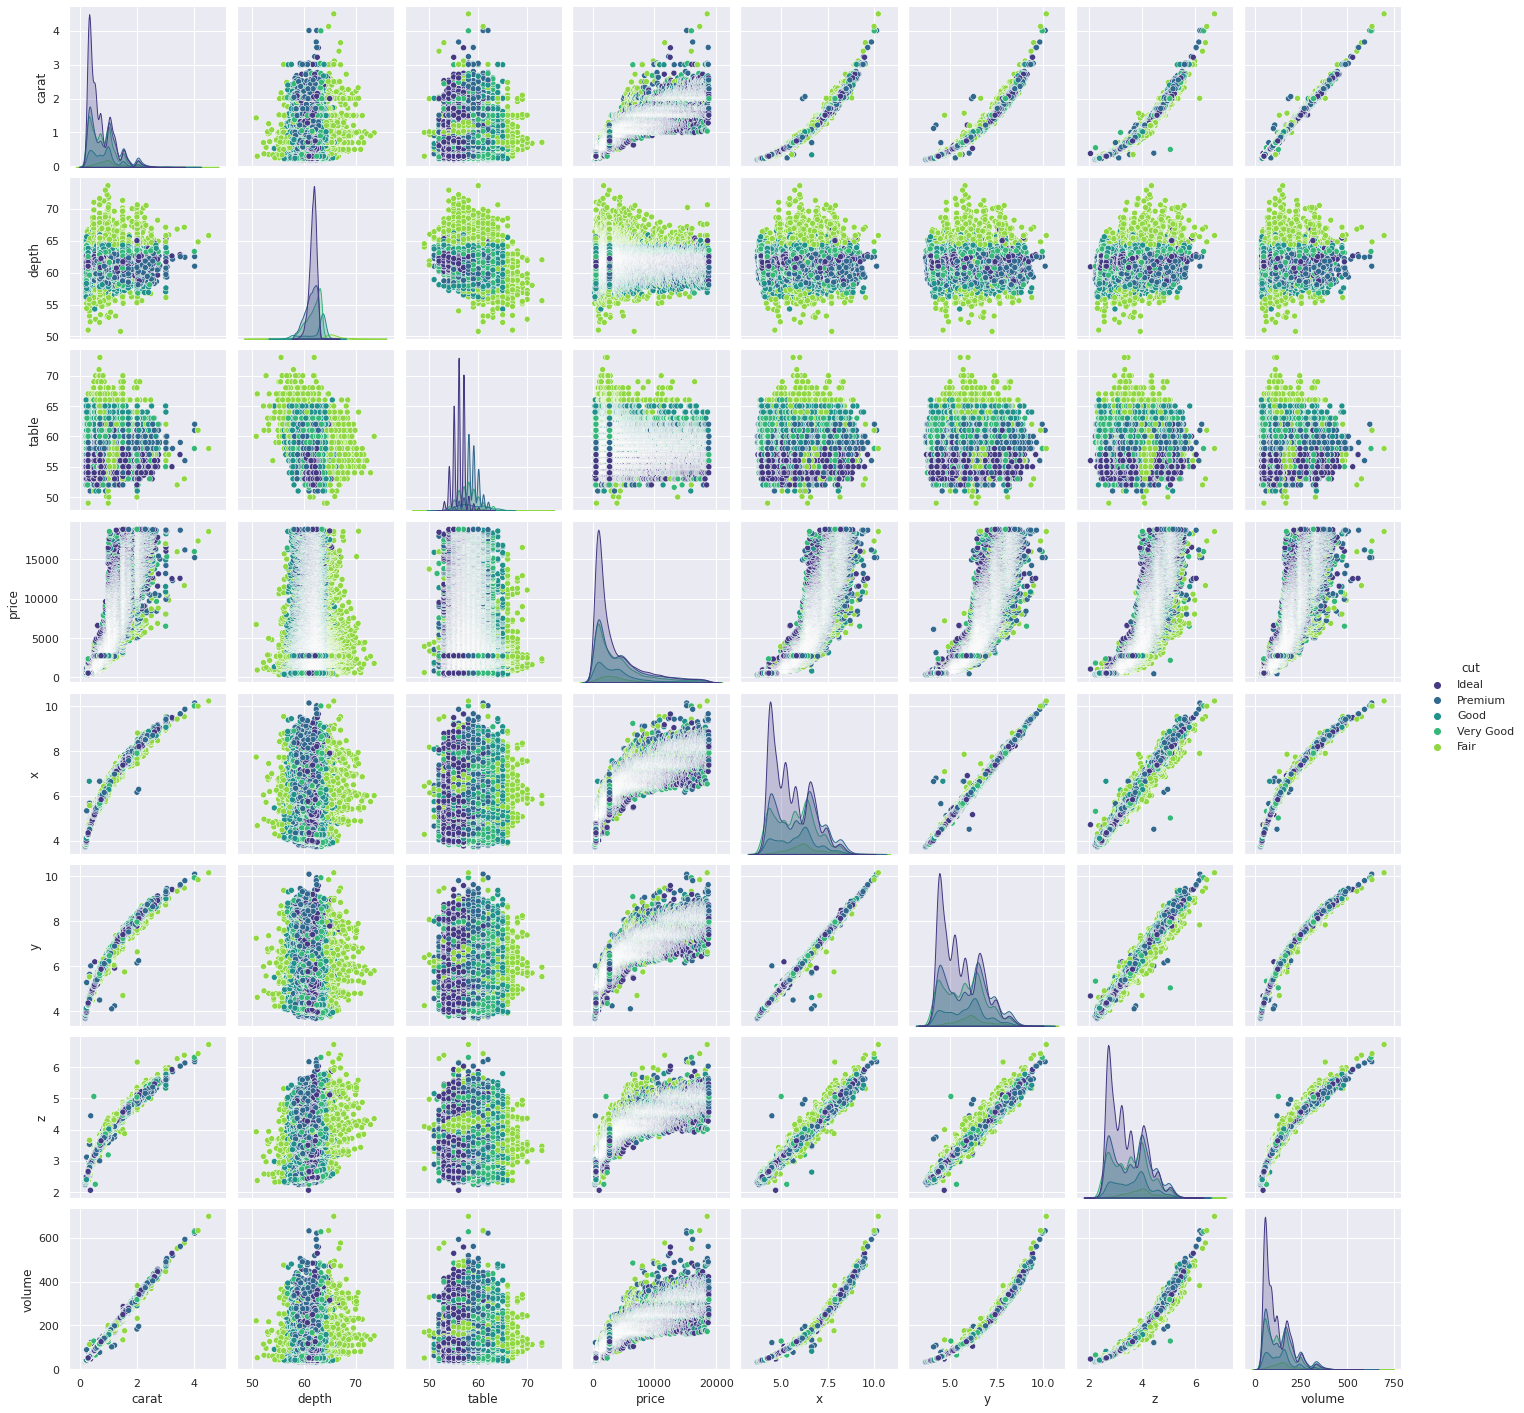

In [58]:
ax = sns.pairplot(df_diamonds, 
                  hue= "cut",
                  palette = 'viridis')

## **Historgram**

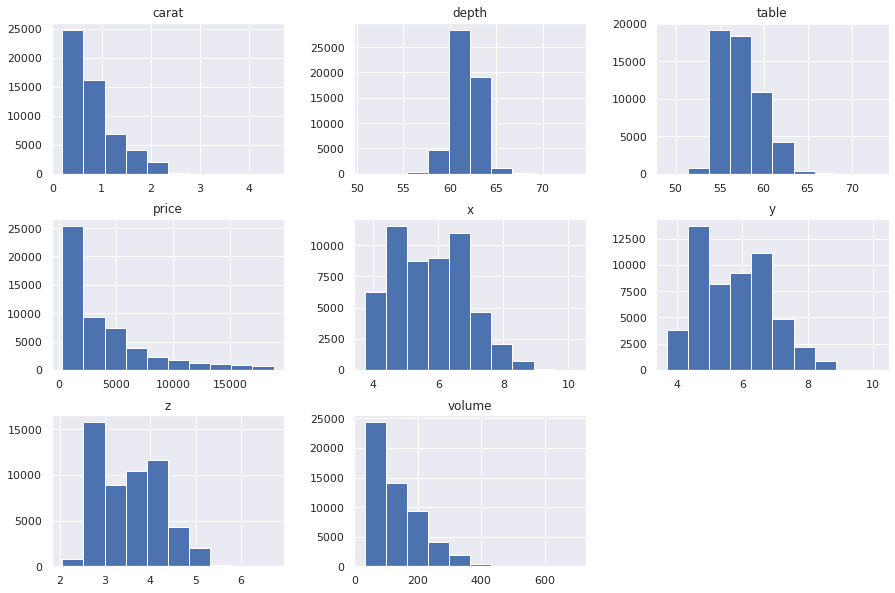

In [59]:
df_diamonds.hist(layout=(3,3), figsize=(15,10))
plt.show()

## **Boxplots**

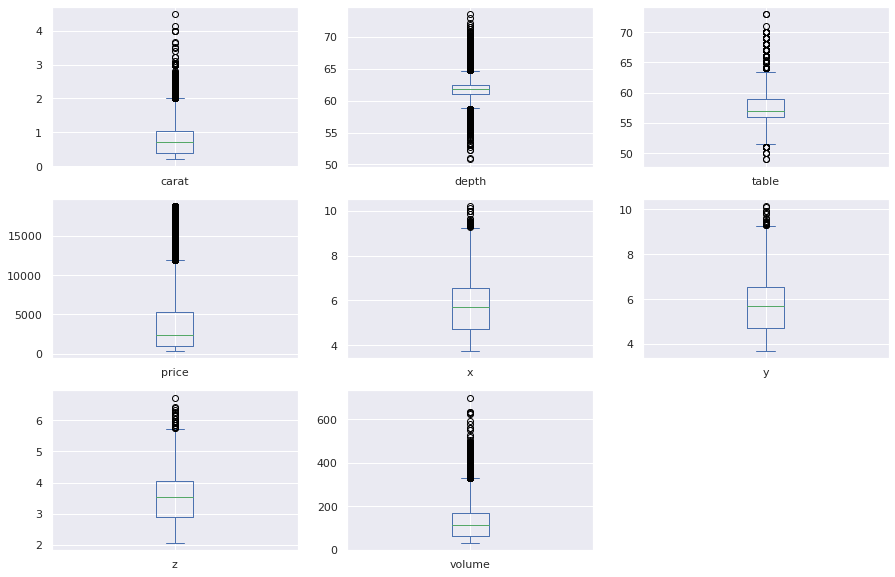

In [60]:
df_diamonds.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

### **Boxplot of Cut, Color, Clarity**

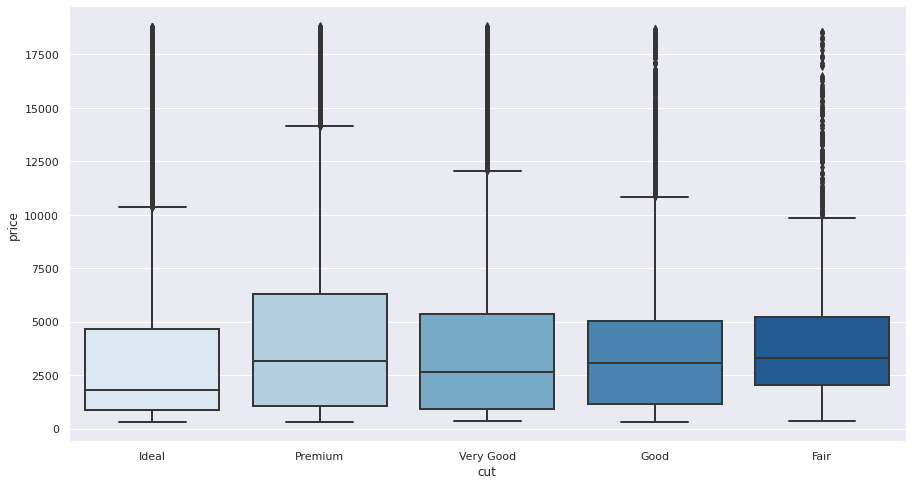

In [102]:
%matplotlib inline

sns.set_theme(style="dark")
sns.set_theme(rc = {'figure.figsize':(15,8)})

sns.boxplot(x=df_diamonds["cut"], 
            y=df_diamonds["price"], 
            linewidth=2, 
            order=['Ideal','Premium', 'Very Good', 'Good', 'Fair'], 
            palette="Blues")

plt.show();

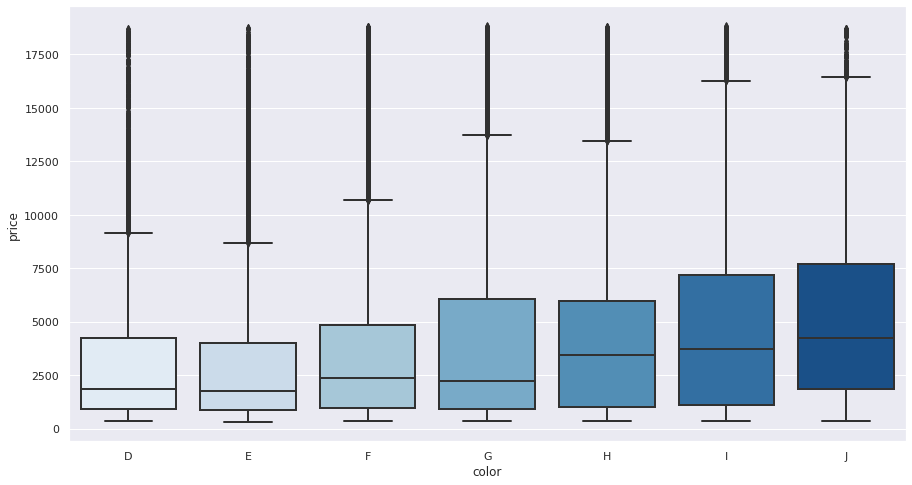

In [103]:
%matplotlib inline
 
sns.set_theme(style="dark")
sns.set_theme(rc = {'figure.figsize':(15,8)})

sns.boxplot(x=df_diamonds["color"],
            y=df_diamonds["price"], 
            order=['D', 'E', 'F', 'G', 'H', 'I', 'J'], 
            linewidth=2, 
            palette="Blues")

plt.show();

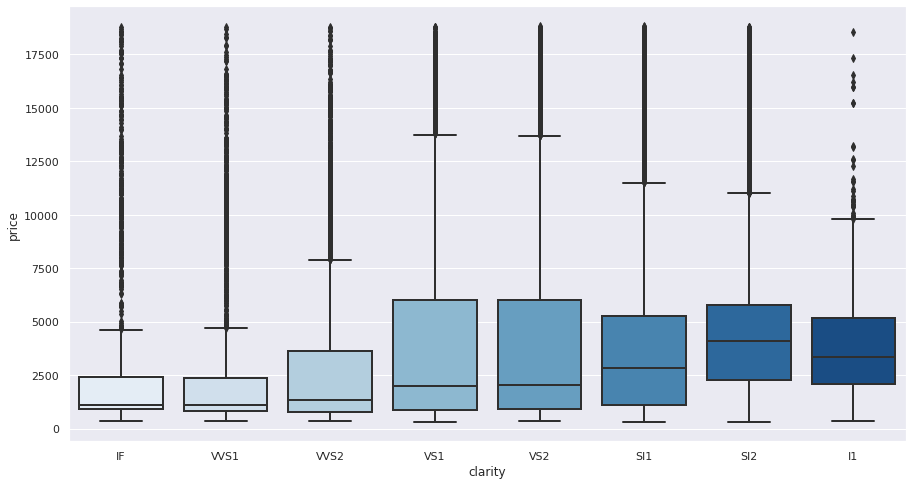

In [104]:
%matplotlib inline

sns.set_theme(style="dark")
sns.set_theme(rc = {'figure.figsize':(15,8)})

sns.boxplot(x=df_diamonds["clarity"], 
            y=df_diamonds["price"], 
            order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], 
            linewidth=2, 
            palette="Blues")
plt.show();

### **Ordinal Encoding**

Creating a rank system for `cut`, `color`, and `clarity`. 

In [40]:
# Cut rank
cut_two = pd.DataFrame(df_diamonds['cut'])
df_diamonds['cut_rk']= cut_two.replace({'cut':{'Ideal' : 1, 'Premium' : 2, 'Very Good' : 3, 'Good' : 4, 'Fair' : 5}})

In [41]:
# Color rank
color_two = pd.DataFrame(df_diamonds['color'])
df_diamonds['color_rk']= color_two.replace({'color':{'D' : 1, 'E' : 2, 'F' : 3, 'G' : 4, 'H' : 5, 'I' : 6, 'J' : 7}}) 

In [42]:
# Clarity rank
clarity_two = pd.DataFrame(df_diamonds['clarity'])
df_diamonds['clarity_rk']= clarity_two.replace({'clarity':{'IF' : 1, 'VVS1' : 2, 'VVS2' : 3, 'VS1' : 4, 'VS2' : 5, 'SI1' : 6, 'SI2' : 7, 'I1' : 8}}) 

## **Correlation Heatmap**

In [22]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

df_corr = df_diamonds.corr() 

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        colorscale='Viridis'
    )
)

In [10]:
df_diamonds.to_csv('diamonds_new.csv', index=False)

# **Models**

---

In [38]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

Slicing the data on for numeric columns and removing highly correlated `x`, `y`, and `z`.

In [43]:
df = df_diamonds.drop(df_diamonds.columns[[1, 2, 3, 7, 8, 9]], axis=1)
df.head()

,carat,depth,table,price,volume,cut_rk,color_rk,clarity_rk
0,0.23,61.5,55.0,326,38.20,1,2,7
1,0.21,59.8,61.0,326,34.51,2,2,6
2,0.23,56.9,65.0,327,38.08,4,2,4
3,0.29,62.4,58.0,334,46.72,2,6,5
4,0.31,63.3,58.0,335,51.92,4,7,7


Scaling the features

In [44]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df_diamonds_scaled = pd.DataFrame(standard_scaler.fit_transform(df),
                                          columns=df.columns)
df_diamonds_scaled.head()

,carat,depth,table,price,volume,cut_rk,color_rk,clarity_rk
0,-1.198817,-0.175700,-1.105557,-0.904080,-1.198845,-0.981476,-0.936934,1.245681
1,-1.241062,-1.373172,1.595652,-0.904080,-1.247144,-0.085459,-0.936934,0.638536
2,-1.198817,-3.415919,3.396457,-0.903829,-1.200416,1.706574,-0.936934,-0.575752
3,-1.072082,0.458256,0.245047,-0.902073,-1.087325,-0.085459,1.414295,0.031392
4,-1.029837,1.092211,0.245047,-0.901822,-1.019261,1.706574,2.002102,1.245681


## **Linear Regression**

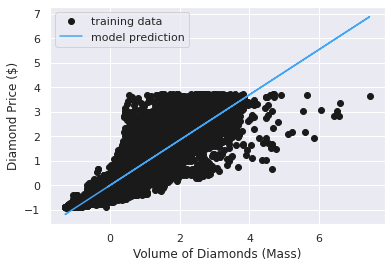

In [45]:
from sklearn.linear_model import LinearRegression

X = df_diamonds_scaled[['volume']]
y = df_diamonds_scaled['price']

lr = LinearRegression()   
lr.fit(X, y)             

y_pred = lr.predict(X)

plt.plot(X, y, 'o', color = 'k', label='training data')
plt.plot(X, y_pred, color='#42a5f5ff', label='model prediction')
plt.xlabel('Volume of Diamonds (Mass)')
plt.ylabel('Diamond Price ($)')
plt.legend();

In [28]:
from sklearn import metrics

print("Mean absolute error (MAE):", metrics.mean_absolute_error(y, y_pred))
print("Mean squared error (MSE):", metrics.mean_squared_error(y, y_pred))
print("Root Mean squared error (RMSE):", np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("R^2:", metrics.r2_score(y, y_pred))

Mean absolute error (MAE): 0.2505992415063422
Mean squared error (MSE): 0.1465545262843114
Root Mean squared error (RMSE): 0.3828244065943437
R^2: 0.8534454737156886


## **Multiple Linear Regression**

In [46]:
features = ['carat', 'depth','table', 'volume', 'cut_rk', 'color_rk', 'clarity_rk']
X = df_diamonds_scaled[features]
y = df_diamonds_scaled['price']

lr_many_features = LinearRegression()
lr_many_features.fit(X, y);

In [30]:
print(('prediction = ' +
       '{} +\n'.format(lr_many_features.intercept_) +
       ' +\n'.join(['{} * {}'.format(n, f) for f, n in zip(features, lr_many_features.coef_)])))

prediction = 2.589476119376005e-16 +
0.11935791009746609 * carat +
0.0036623212292045126 * depth +
-0.0006422984576668067 * table +
0.9229942229753453 * volume +
-0.031521976753149175 * cut_rk +
-0.13591598330479643 * color_rk +
-0.21507245231196492 * clarity_rk


In [52]:
print('Multiple features linear model R^2 on training data set: {}'.format(lr_many_features.score(X, y)))

Multiple features linear model R^2 on training data set: 0.9059466891034228


## **Random Forest**

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=321)

In [166]:
from sklearn.ensemble import RandomForestRegressor

forest  = RandomForestRegressor()
model = forest.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [167]:
from sklearn.metrics import mean_squared_error

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(metrics.r2_score((y_test),(y_pred)))))

RMSE: 0.13191401153332313
R2  : 0.9912175810216939


In [168]:
n_estimators = [int(x) for x in np.linspace(10,200,10)]
max_depth = [int(x) for x in np.linspace(10,100,10)]
min_samples_split = [2,3,4,5,10]
min_samples_leaf = [1,2,4,10,15,20]
random_grid = {'n_estimators':n_estimators,'max_depth':max_depth,
               'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

random_grid

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_leaf': [1, 2, 4, 10, 15, 20],
 'min_samples_split': [2, 3, 4, 5, 10],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}

In [169]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               cv = 3)

rf_random.fit(X_train,y_train)
y_pred = rf_random.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(metrics.r2_score((y_test),(y_pred)))))

RMSE: 0.13224621848979198
R2  : 0.9911730935294353


In [170]:
rf_random.best_params_

{'max_depth': 100,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 178}

In [171]:
rf = RandomForestRegressor(max_depth = 100,
                         min_samples_leaf = 2,
                         min_samples_split = 2,
                         n_estimators = 178)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(metrics.r2_score((y_test),(y_pred)))))

RMSE: 0.1320848174143195
R2  : 0.9911947217783478


## **AutoML using H20**

In [ ]:
!apt-get install openjdk-8-jdk

In [ ]:
!pip install H2O

In [53]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjj_kvf9p
  JVM stdout: /tmp/tmpjj_kvf9p/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjj_kvf9p/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_inkqa6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [2]:
diamonds = h2o.import_file("/content/diamonds_new.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [82]:
diamonds.describe()

Rows:53902
Cols:14




,carat,cut,color,clarity,depth,table,price,x,y,z,volume,cut_rk,color_rk,clarity_rk
type,real,enum,enum,enum,real,real,int,real,real,real,real,int,int,int
mins,0.2,,,,50.8,49.0,326.0,3.73,3.68,2.06,31.71,1.0,1.0,1.0
mean,0.7975546361916077,,,,61.74943415828728,57.45569366628322,3930.426793068903,5.731397907313265,5.733238655337458,3.539386850209639,129.79038885384568,2.0953767949241198,3.593948276501803,4.948295053986866
maxs,4.5,,,,73.6,73.0,18823.0,10.23,10.16,6.72,698.46,5.0,7.0,8.0
sigma,0.47343323947185206,,,,1.4196703364355991,2.221248682189408,3986.8836775360587,1.1192018720191774,1.111083096761398,0.691292416429462,76.39956459996696,1.1160610424871082,1.7012537757016888,1.6470707425751165
zeros,0,,,,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.2,1.0,2.0,7.0
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,34.51,2.0,2.0,6.0
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,38.08,4.0,2.0,4.0


In [3]:
diamonds = diamonds[:, ["carat", "depth", "table", "price", "volume", "cut_rk",	"color_rk", "clarity_rk"]]
print(diamonds)

carat,depth,table,price,volume,cut_rk,color_rk,clarity_rk
0.23,61.5,55,326,38.2,1,2,7
0.21,59.8,61,326,34.51,2,2,6
0.23,56.9,65,327,38.08,4,2,4
0.29,62.4,58,334,46.72,2,6,5
0.31,63.3,58,335,51.92,4,7,7
0.24,62.8,57,336,38.69,3,7,3
0.24,62.3,57,336,38.83,3,6,2
0.26,61.9,55,337,42.32,3,5,6
0.22,65.1,61,337,36.43,5,2,5
0.23,59.4,61,338,38.72,3,5,4


### **GBM Model**

In [6]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# set the predictor names and the response column name
predictors = ["carat",	"depth",	"table",	"volume", "cut_rk",	"color_rk",	"clarity_rk"]	

response = "price"

# split into train and validation sets
train, valid = diamonds.split_frame(ratios = [.8], seed = 1234)

# train a GBM model
diamonds_gbm = H2OGradientBoostingEstimator(distribution = "poisson", seed = 1234)
diamonds_gbm.train(x = predictors,
               y = response,
               training_frame = train,
               validation_frame = valid)

# retrieve the model performance
perf = diamonds_gbm.model_performance(valid)
perf

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 297175.9346014002
RMSE: 545.1384545245365
MAE: 298.17434419493014
RMSLE: 0.12287040514285516
Mean Residual Deviance: -59961.81794308857


In [7]:
print('R^2:', diamonds_gbm.r2())
print('R^2 on validation data:', diamonds_gbm.r2(valid=True))

R^2: 0.9814291623069304
R^2 on validation data: 0.9812236569623808


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

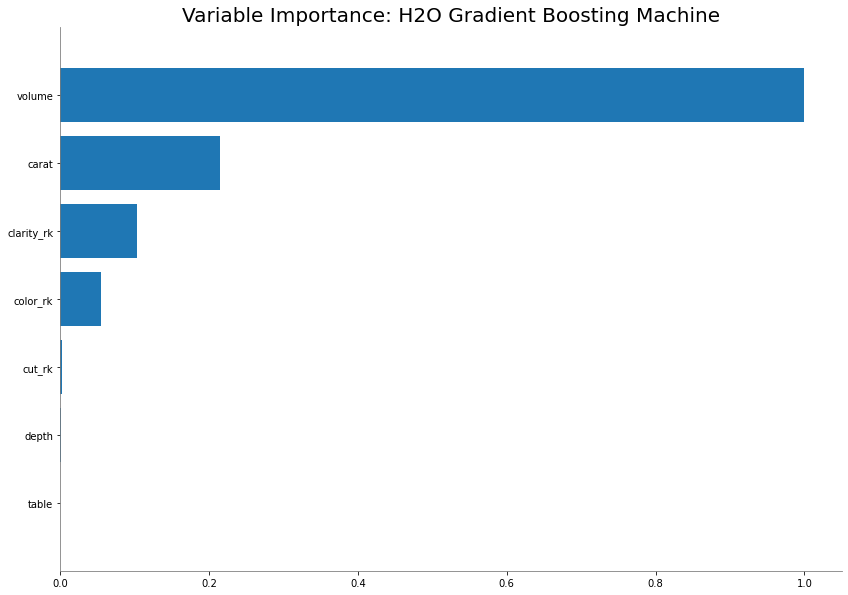

<Figure size 432x288 with 0 Axes>

In [9]:
diamonds_gbm.varimp_plot();

### **AutoML Search**

In [10]:
from h2o.automl import H2OAutoML

y = "price"

splits = diamonds.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [11]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "diamonds_lb_frame")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_2_AutoML_1_20220524_162247

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 161938.39018806818
RMSE: 402.4156932676311
MAE: 220.7877598599966
RMSLE: 0.08778344307949035
R^2: 0.9897187253749596
Mean Residual Deviance: 161938.39018806818
Null degrees of freedom: 10063
Residual degrees of freedom: 10060
Null deviance: 158518164125.60925
Residual deviance: 1629747958.852718
AIC: 149287.78529932746

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 292904.99543856416
RMSE: 541.2069802197345
MAE: 278.4709657509555
RMSLE: 0.10112574270266088
R^2: 0.982358202719312
Mean Residual Deviance: 292904.99543856416
Null degrees of freedom: 4424
Residual degrees of freedom: 4421
Null deviance: 73479405051.87427


In [12]:
aml2 = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "diamonds_full_data")
aml2.train(y = y, training_frame = diamonds)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_2_AutoML_2_20220524_162357

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 138826.82775252234
RMSE: 372.59472319468284
MAE: 204.39755930071115
RMSLE: 0.08147085766295006
R^2: 0.9913322116029226
Mean Residual Deviance: 138826.82775252234
Null degrees of freedom: 10060
Residual degrees of freedom: 10057
Null deviance: 161145712751.90436
Residual deviance: 1396736714.0181272
AIC: 147694.0070222262

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 282593.98661155737
RMSE: 531.5956984509538
MAE: 271.81878422685537
RMSLE: 0.09838611409008427
R^2: 0.9828973674669435
Mean Residual Deviance: 282593.98661155737
Null degrees of freedom: 5459
Residual degrees of freedom: 5456
Null deviance: 90264416715.43

In [13]:
aml.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_2_AutoML_1_20220524_162247,532.73,283801,275.064,0.100709,283801
StackedEnsemble_BestOfFamily_3_AutoML_1_20220524_162247,533.343,284454,275.808,0.101403,284454
StackedEnsemble_AllModels_2_AutoML_1_20220524_162247,533.498,284620,273.502,0.0995237,284620
StackedEnsemble_AllModels_1_AutoML_1_20220524_162247,533.686,284821,273.609,0.0995031,284821
GBM_2_AutoML_1_20220524_162247,537.035,288407,280.385,0.103165,288407
GBM_3_AutoML_1_20220524_162247,539.86,291449,277.797,0.0996754,291449
GBM_5_AutoML_1_20220524_162247,543.52,295414,285.315,0.106712,295414
StackedEnsemble_BestOfFamily_1_AutoML_1_20220524_162247,547.002,299211,278.922,0.104543,299211
GBM_4_AutoML_1_20220524_162247,551.679,304349,292.328,0.119531,304349
XGBoost_3_AutoML_1_20220524_162247,556.173,309329,293.883,0.116456,309329


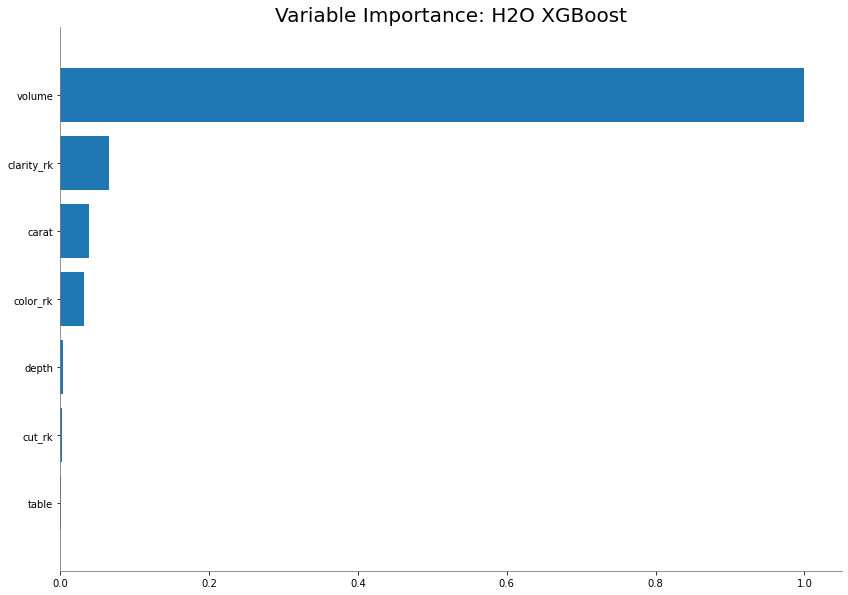

<Figure size 432x288 with 0 Axes>

In [18]:
best_model_aml = h2o.get_model(aml.leaderboard[9,'model_id'])

best_model_aml.varimp_plot();

In [56]:
print('XGBoost_3_AutoML R^2:', best_model_aml.r2())
print('XGBoost_3_AutoML R^2 on validation data:', best_model_aml.r2(valid=True))

XGBoost_3_AutoML R^2: 0.9870193028366475
XGBoost_3_AutoML R^2 on validation data: 0.9802658257424989


In [16]:
aml2.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_2_AutoML_2_20220524_162357,531.596,282594,271.819,0.0983861,282594
StackedEnsemble_BestOfFamily_3_AutoML_2_20220524_162357,531.596,282594,271.819,0.0983861,282594
StackedEnsemble_AllModels_1_AutoML_2_20220524_162357,532.017,283042,270.339,0.0967994,283042
StackedEnsemble_AllModels_2_AutoML_2_20220524_162357,533.092,284187,271.096,0.0970842,284187
GBM_2_AutoML_2_20220524_162357,537.9,289337,278.588,0.101383,289337
StackedEnsemble_BestOfFamily_1_AutoML_2_20220524_162357,542.102,293874,276.413,0.0994625,293874
GBM_3_AutoML_2_20220524_162357,542.484,294289,276.929,0.0984264,294289
GBM_1_AutoML_2_20220524_162357,542.522,294330,279.228,0.104282,294330
GBM_4_AutoML_2_20220524_162357,555.048,308078,290.994,0.114923,308078
GBM_5_AutoML_2_20220524_162357,555.721,308826,289.881,0.107596,308826


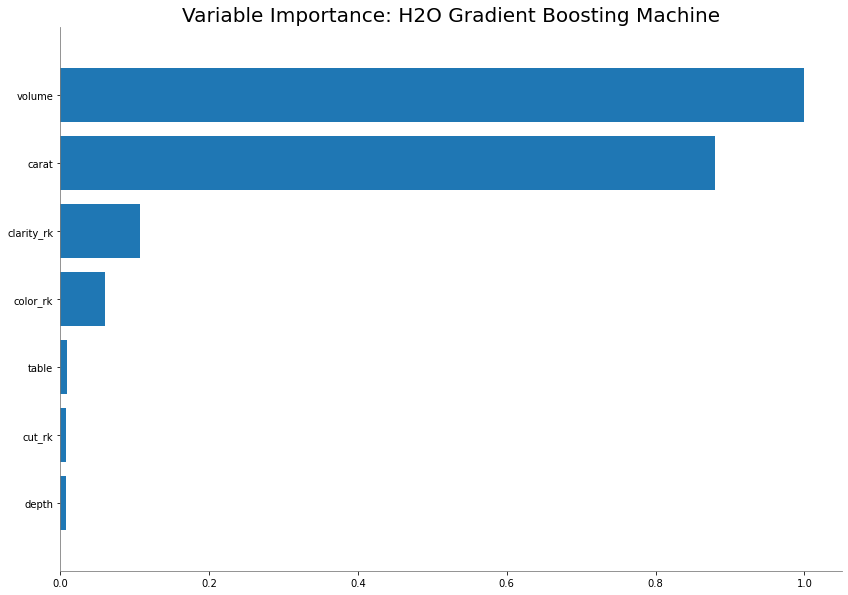

<Figure size 432x288 with 0 Axes>

In [17]:
best_model_aml2 = h2o.get_model(aml2.leaderboard[4,'model_id'])

best_model_aml2.varimp_plot();

In [55]:
print('GBM_2_AutoML R^2:', best_model_aml2.r2())
print('GBM_2_AutoML R^2 on validation data:', best_model_aml2.r2(valid=True))

GBM_2_AutoML R^2: 0.9861479432667472
GBM_2_AutoML R^2 on validation data: 0.9824892967917611


In [23]:
h2o.cluster().shutdown()

H2O session _sid_8a0f closed.


# **Conclusion**

---

- An analysis was performed using the classic `Diamonds` dataset, in which the objective was determining how to best price diamonds for brokers. 
- Through exploration and visualization of the data, observed small generalized patterns, accompanied with not normal distributions. 
- The clearest indication is the combination of best `color` and best `clarity` diamonds are priced significantly higher.   
- After scaling and slicing, the baseline linear regression captured a modest 90% accuracy, while the Random Forest model scored the highest with 99.11%.
- Of the 4 C's `carat`'s coefficient level in the multiple linear regression, and among the variable importance compared favorable against the other 4 C's. 
